In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'datas'

train_data_path = join(data_dir, 'sales_train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

datas/sales_train.csv
datas/test.csv


In [3]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (2935849, 6)
sub data dim : (214200, 3)


# 1. 데이터 살펴보기   
   
ID-  테스트 세트 내에서 (Shop, Item) 튜플을 나타내는 Id   
shop_id- 상점의 고유 식별자   
item_id- 상품의 고유 식별자   
item_category_id- 항목 카테고리의 고유 식별자   
item_cnt_day- 판매 된 제품 수입니다. 이 측정 값의 월별 금액을 예측하고 있습니다.   
item_price- 상품의 현재 가격   
date  -dd / mm / yyyy 형식의 날짜   
date_block_num- 편의를 위해 사용되는 연속 된 월 번호. 2013 년 1 월은 0, 2013 년 2 월은 1, ..., 2015 년 10 월은 33입니다.   
item_name-  항목 이름   
shop_name- 상점 이름   
item_category_name- 항목 카테고리 이름   

In [4]:
del data['date']

del data['item_price']

In [5]:
sub_id = sub['ID']
del sub['ID']

sub['date_block_num'] = 34

In [6]:
print(data.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], dtype='object')


In [7]:
print(sub.columns)

Index(['shop_id', 'item_id', 'date_block_num'], dtype='object')


In [8]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [9]:
sub.head()

,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34


<AxesSubplot:>

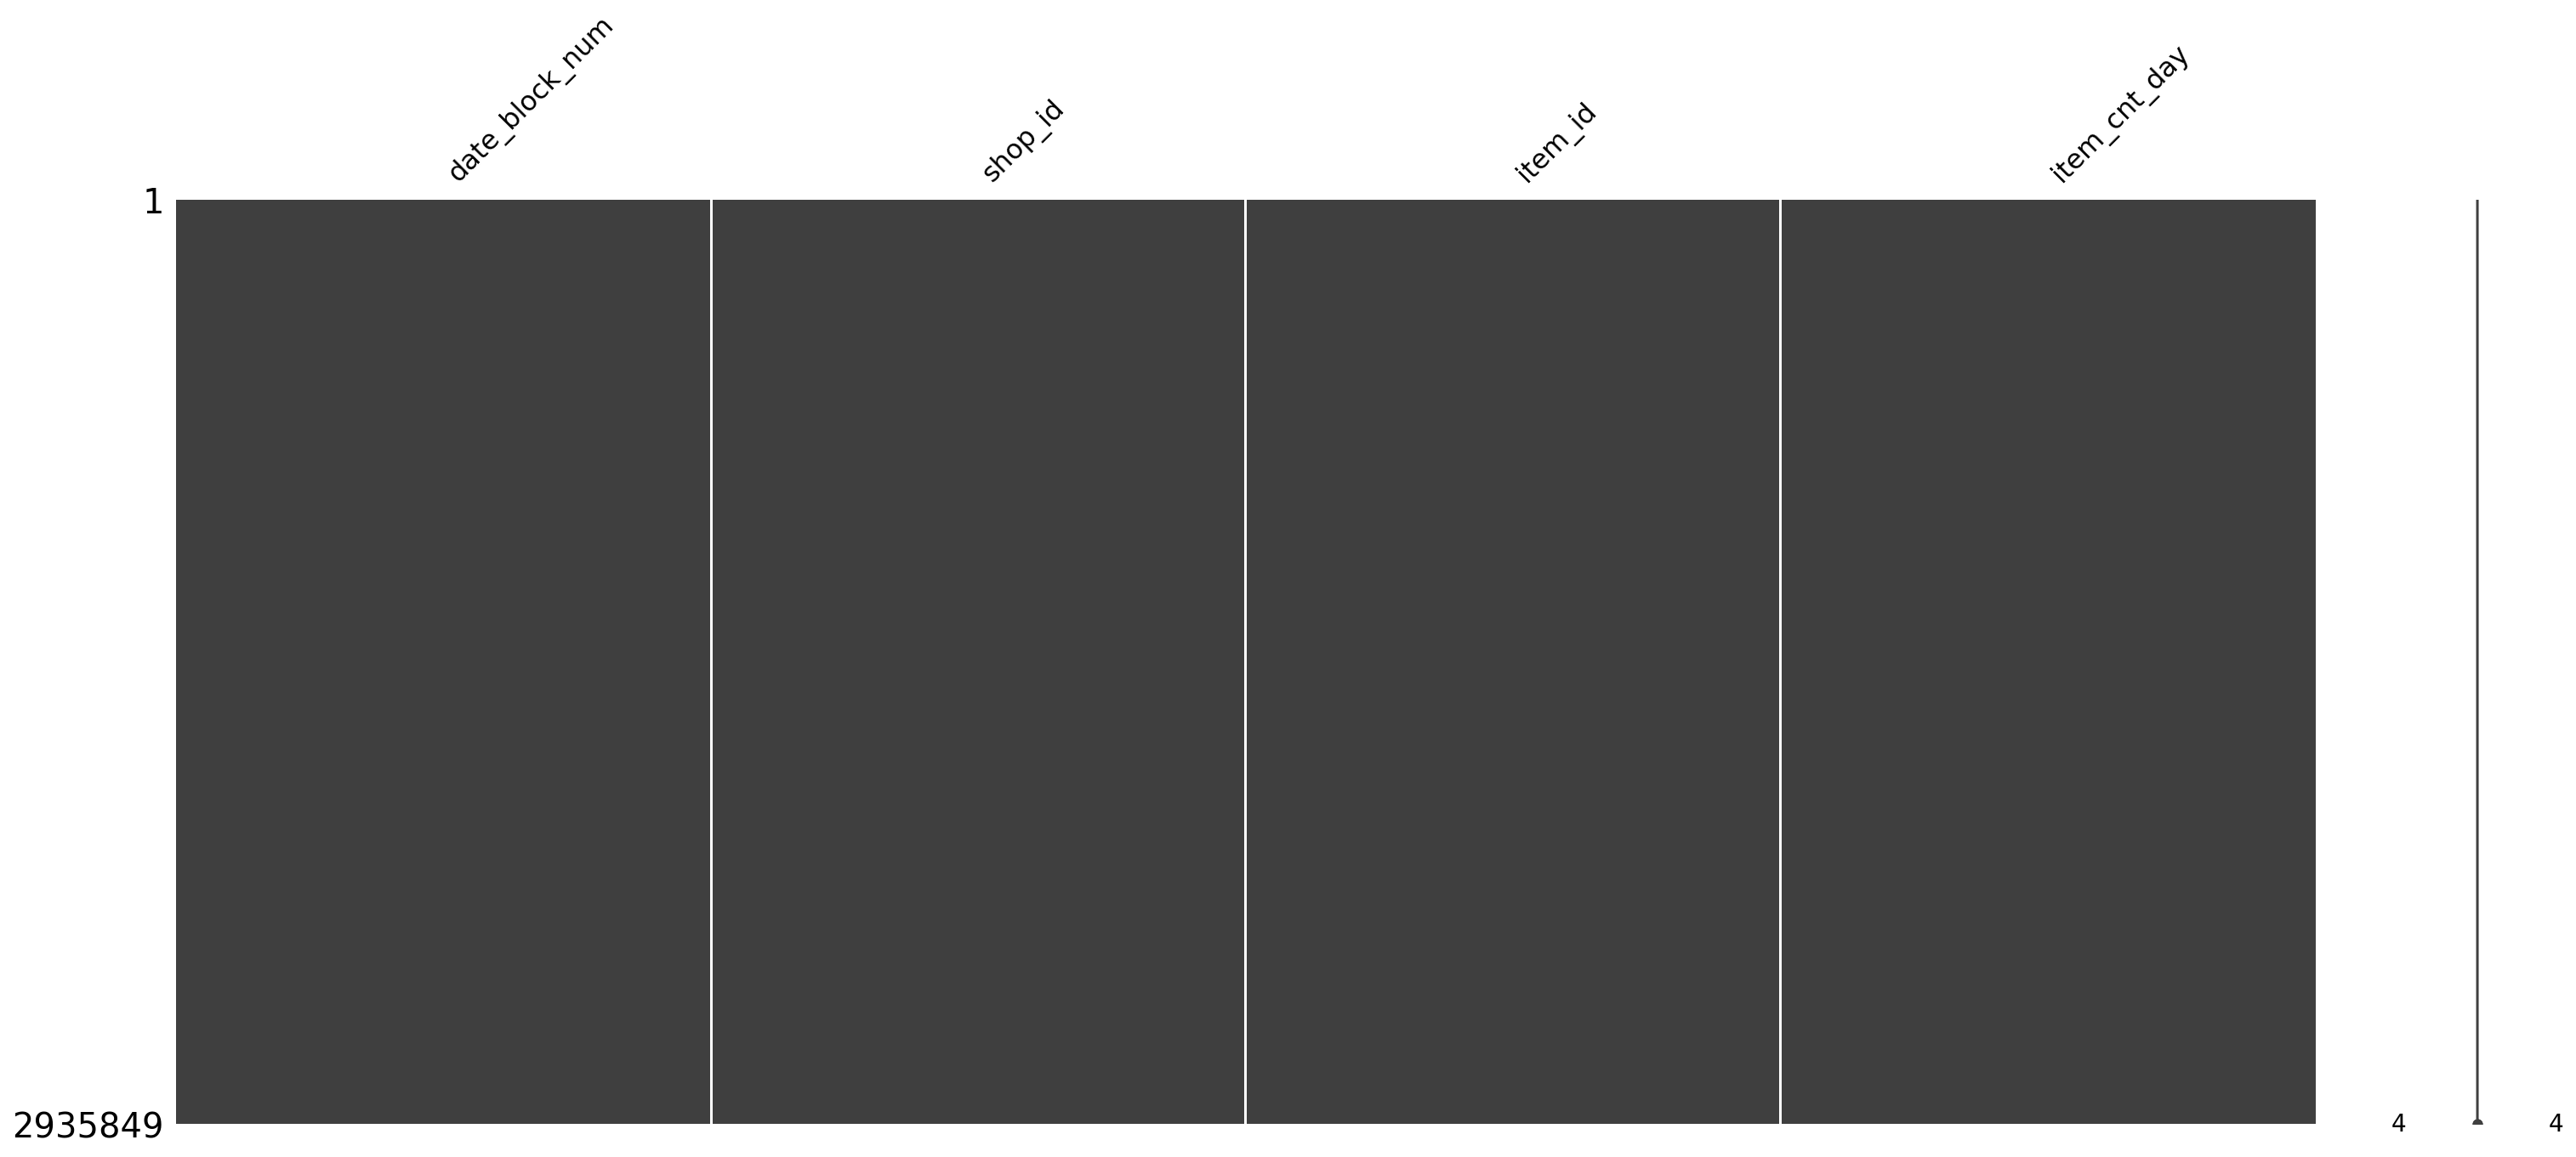

In [10]:
msno.matrix(data)

<AxesSubplot:>

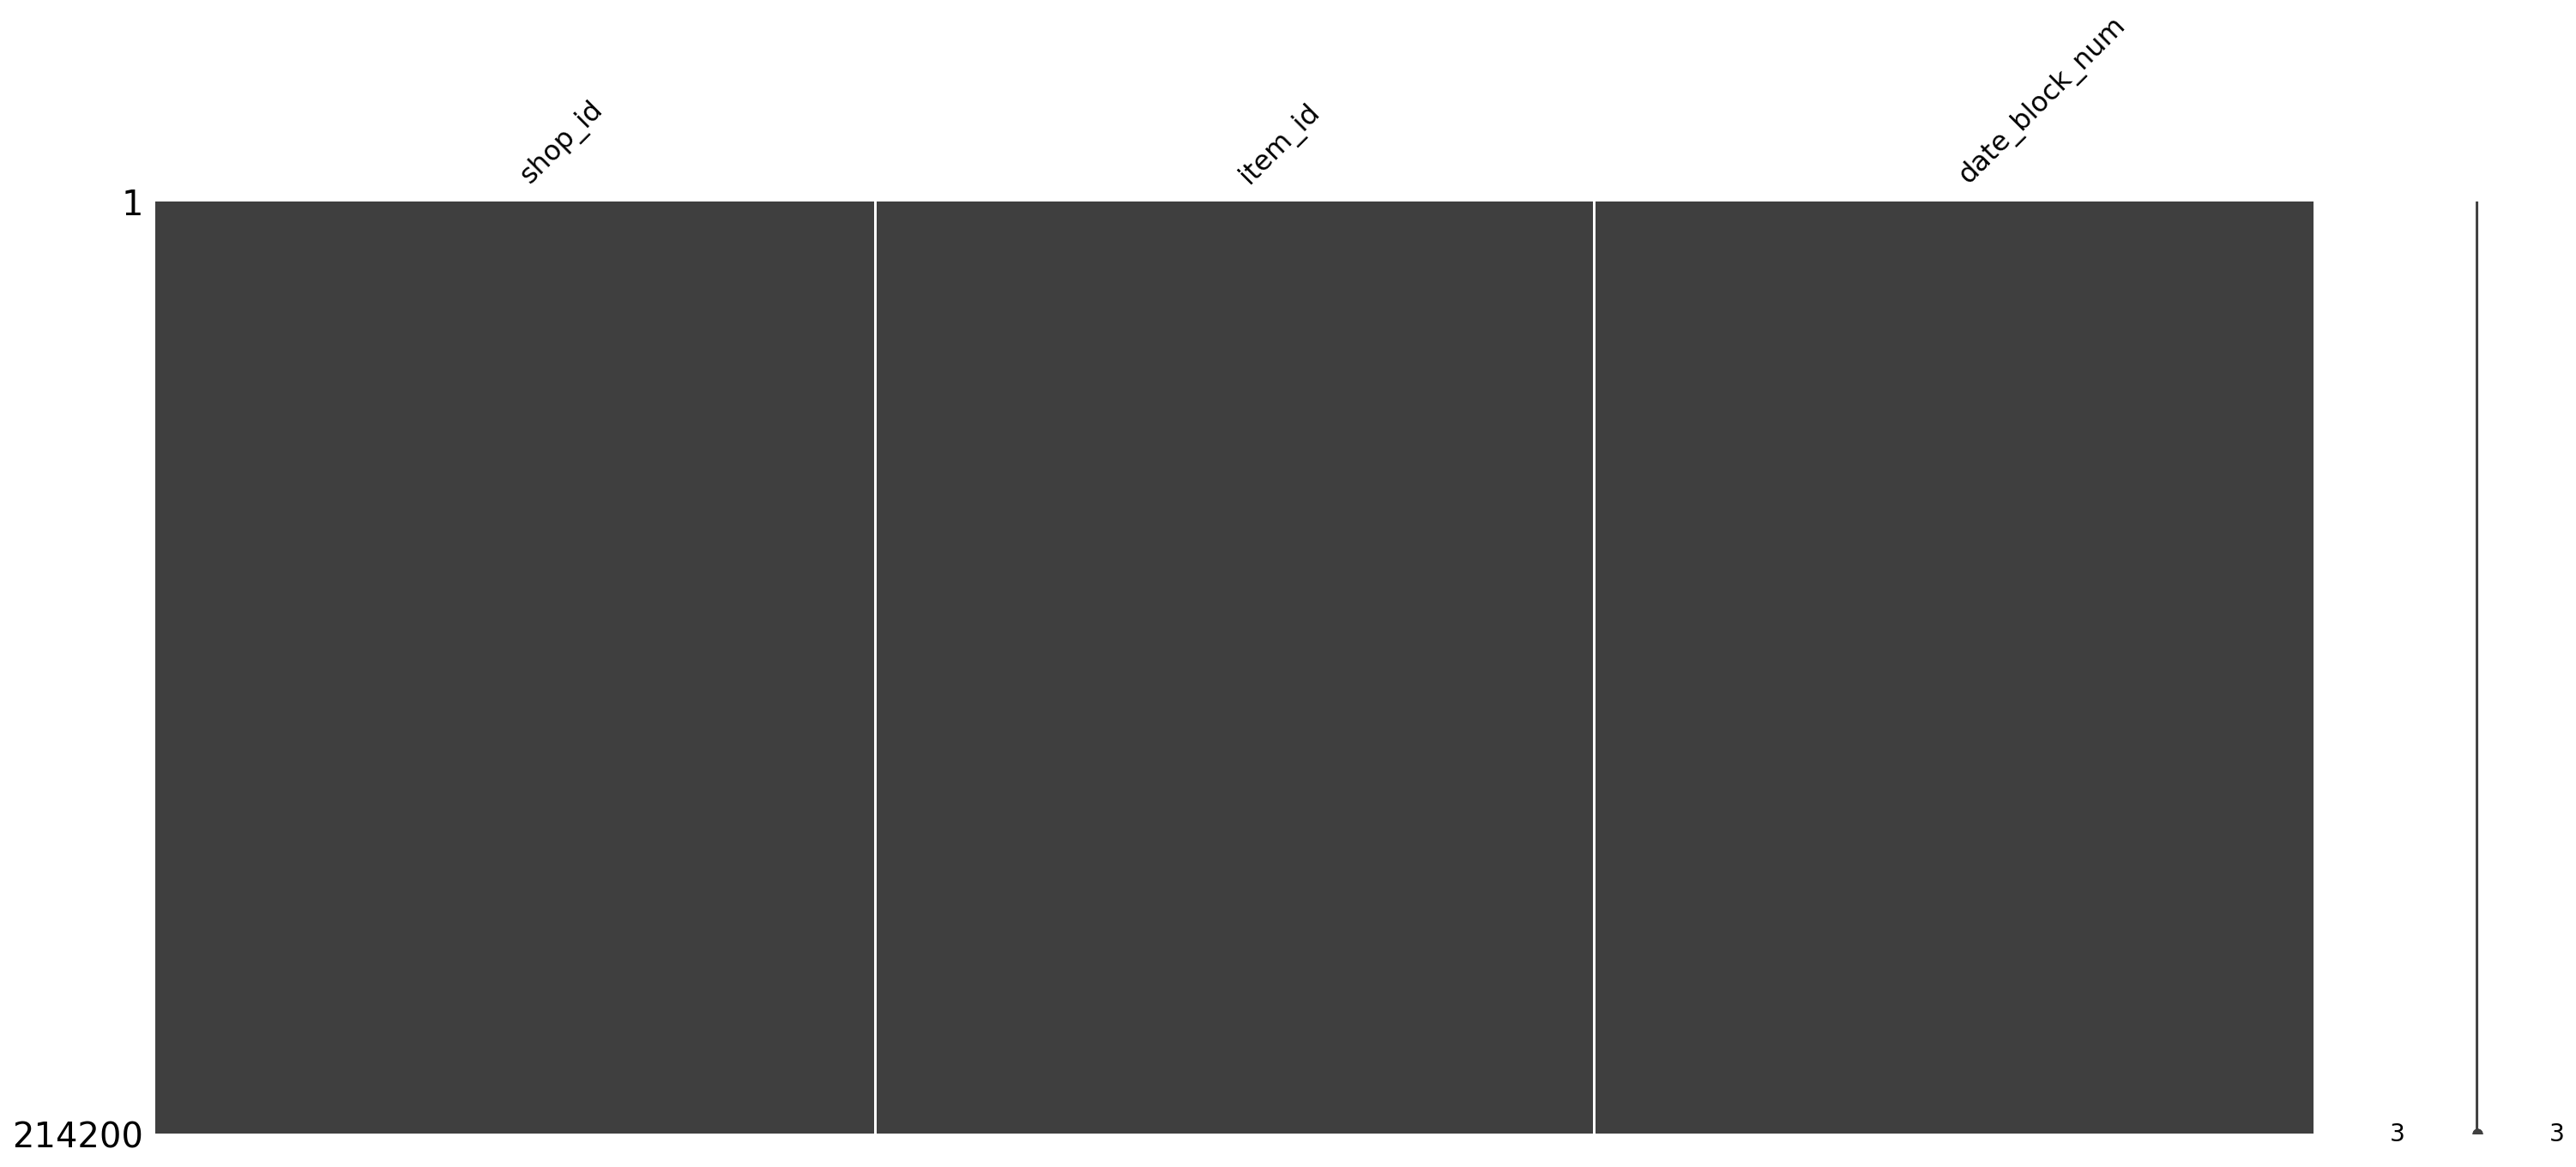

In [11]:
msno.matrix(sub)

In [12]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

date_block_num : 0
shop_id : 0
item_id : 0
item_cnt_day : 0


In [13]:
for c in sub.columns:
    print('{} : {}'.format(c, len(sub.loc[pd.isnull(sub[c]), c].values)))

shop_id : 0
item_id : 0
date_block_num : 0


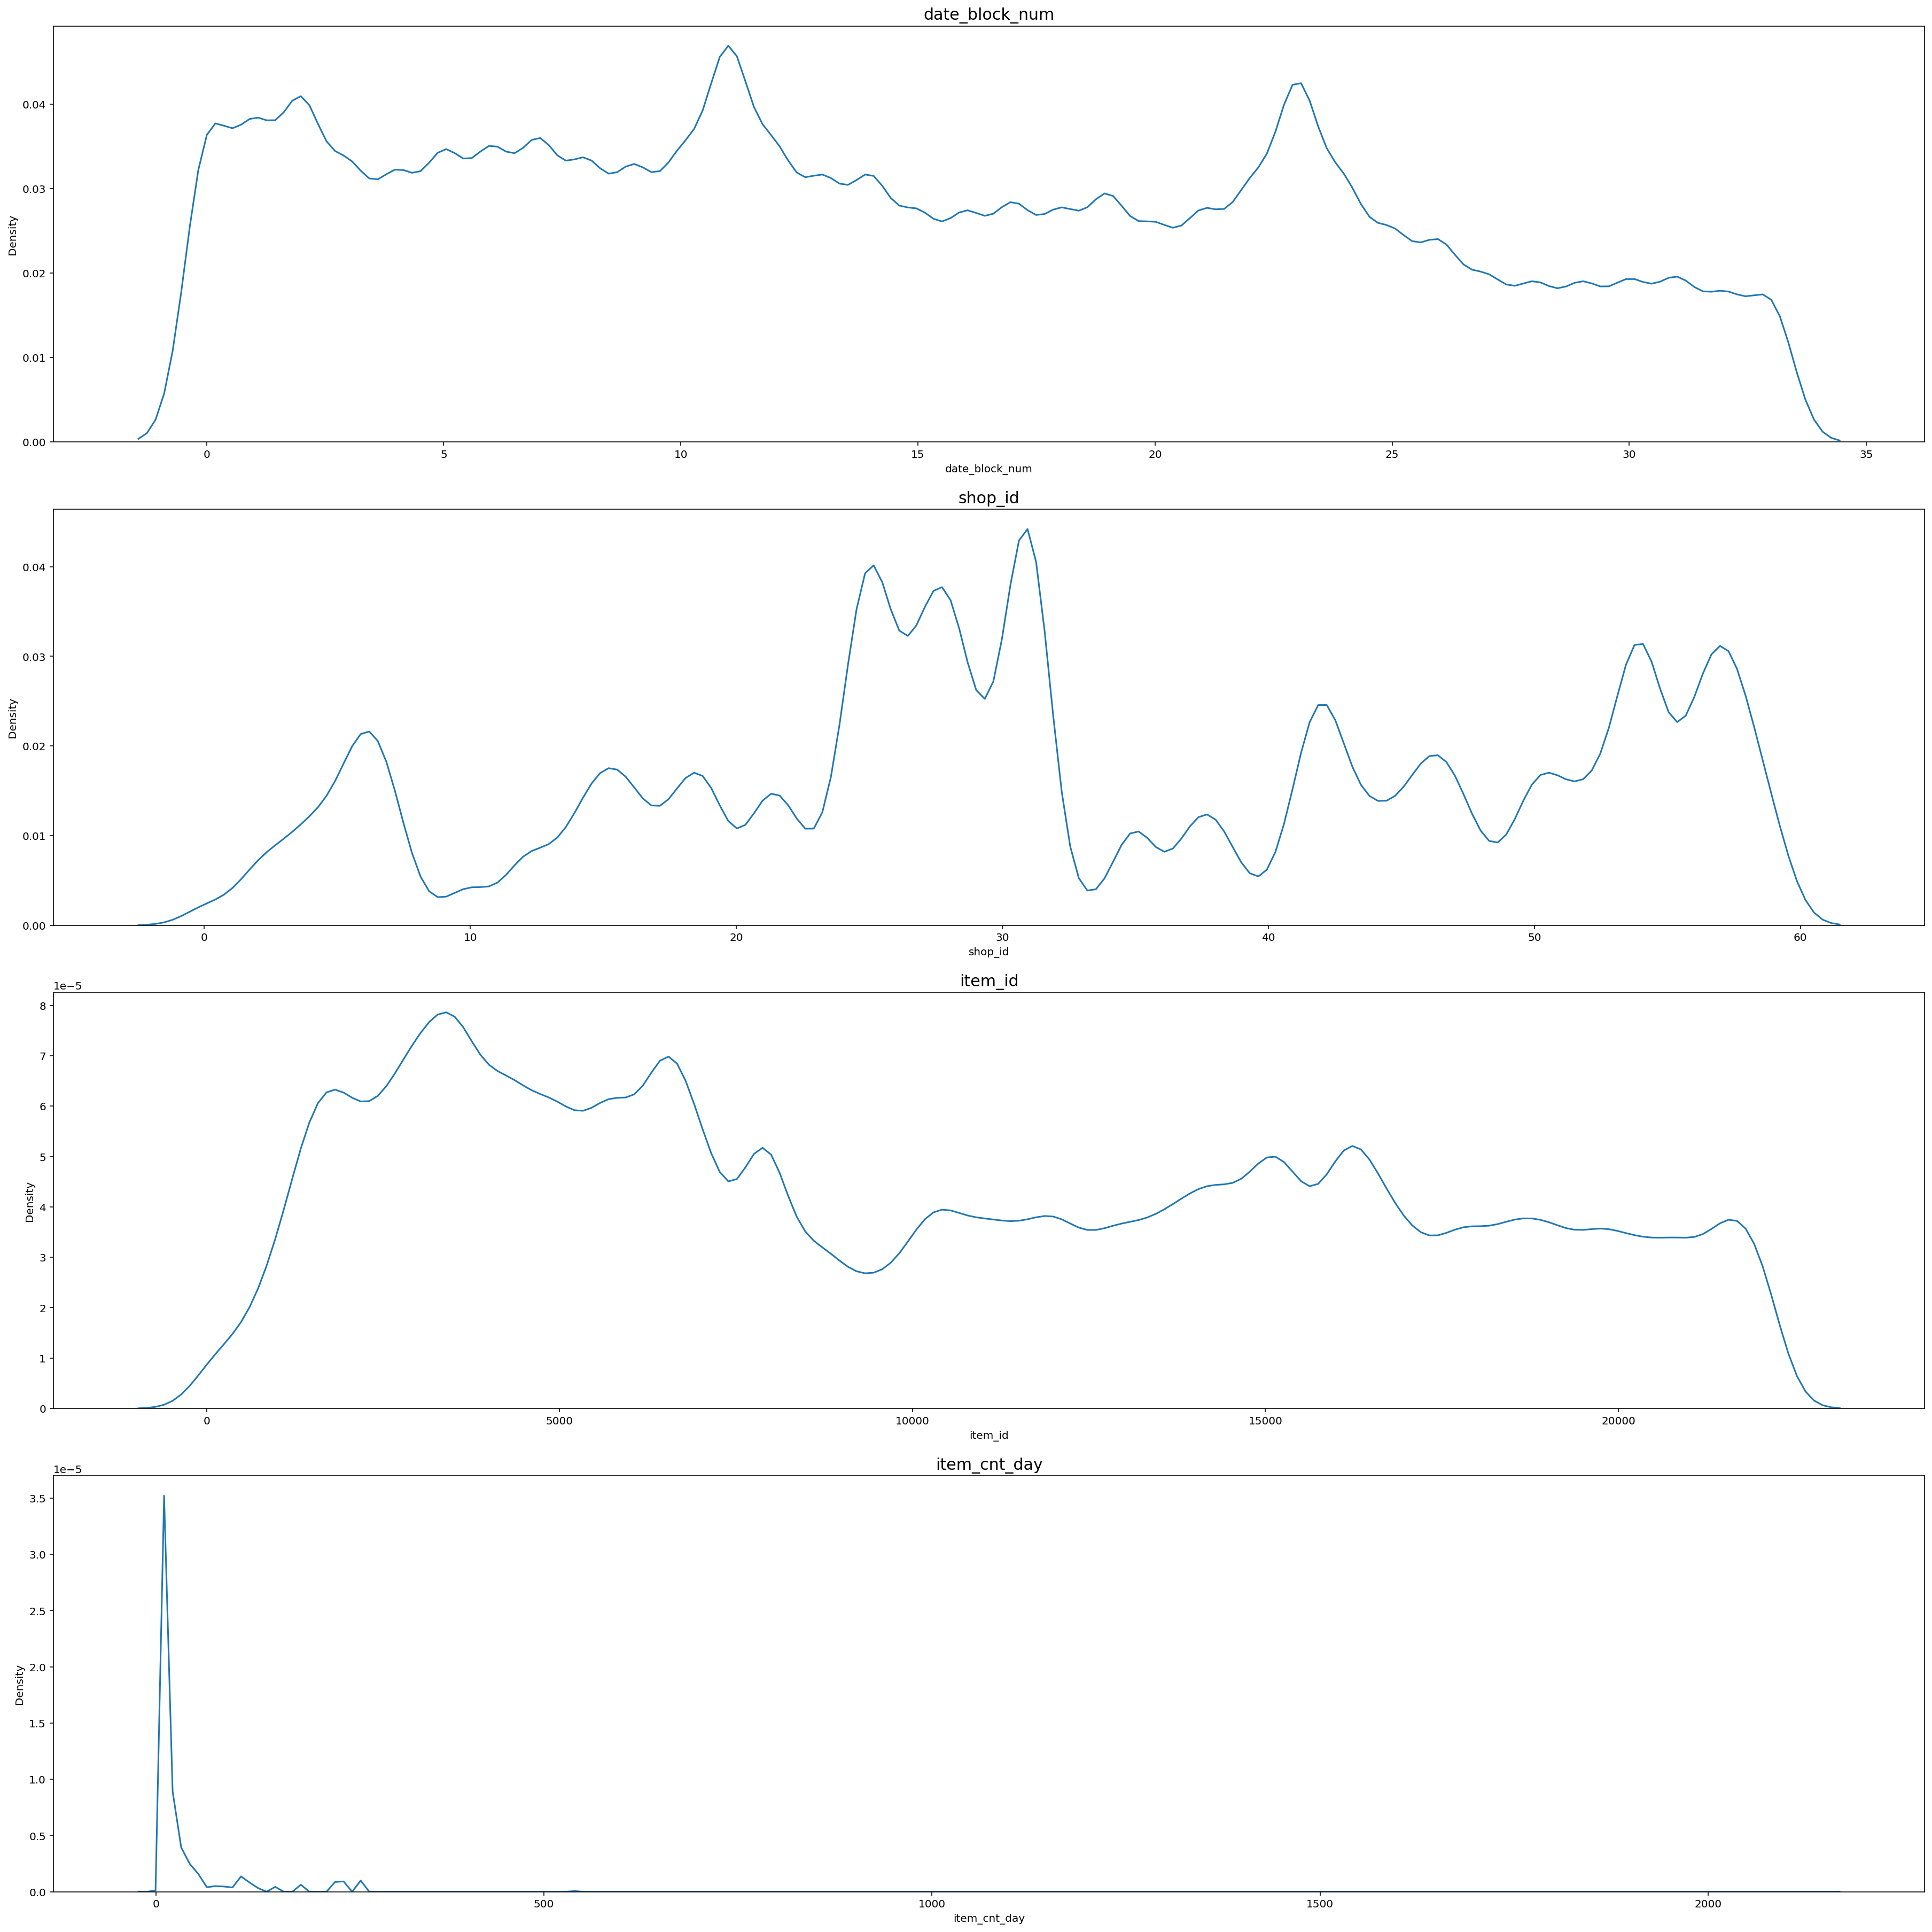

In [14]:
# 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 
# constrained_layout=True 그래프간 겹치지않게 최적의 간격조절
columns = data.columns
fig, ax = plt.subplots(len(columns), figsize=(25, 25), constrained_layout=True)   

for idx, row in enumerate(range(len(columns))):
    sns.kdeplot(data[columns[idx]], ax=ax[row])
    ax[row].set_title(columns[idx], fontsize=15)

In [15]:
#print('아이템 수 최대값', data['item_cnt_day'].max())
#print('아이템 수 최소값', data['item_cnt_day'].min())
#temp = data.loc[data['item_price'] < 1000]

data = data.loc[(data['item_cnt_day'] < 250)&(data['item_cnt_day'] >= 0)]

In [18]:
print('아이템 수 최대값', data['item_cnt_day'].max())
print('아이템 수 최소값', data['item_cnt_day'].min())

아이템 수 최대값 242.0
아이템 수 최소값 1.0


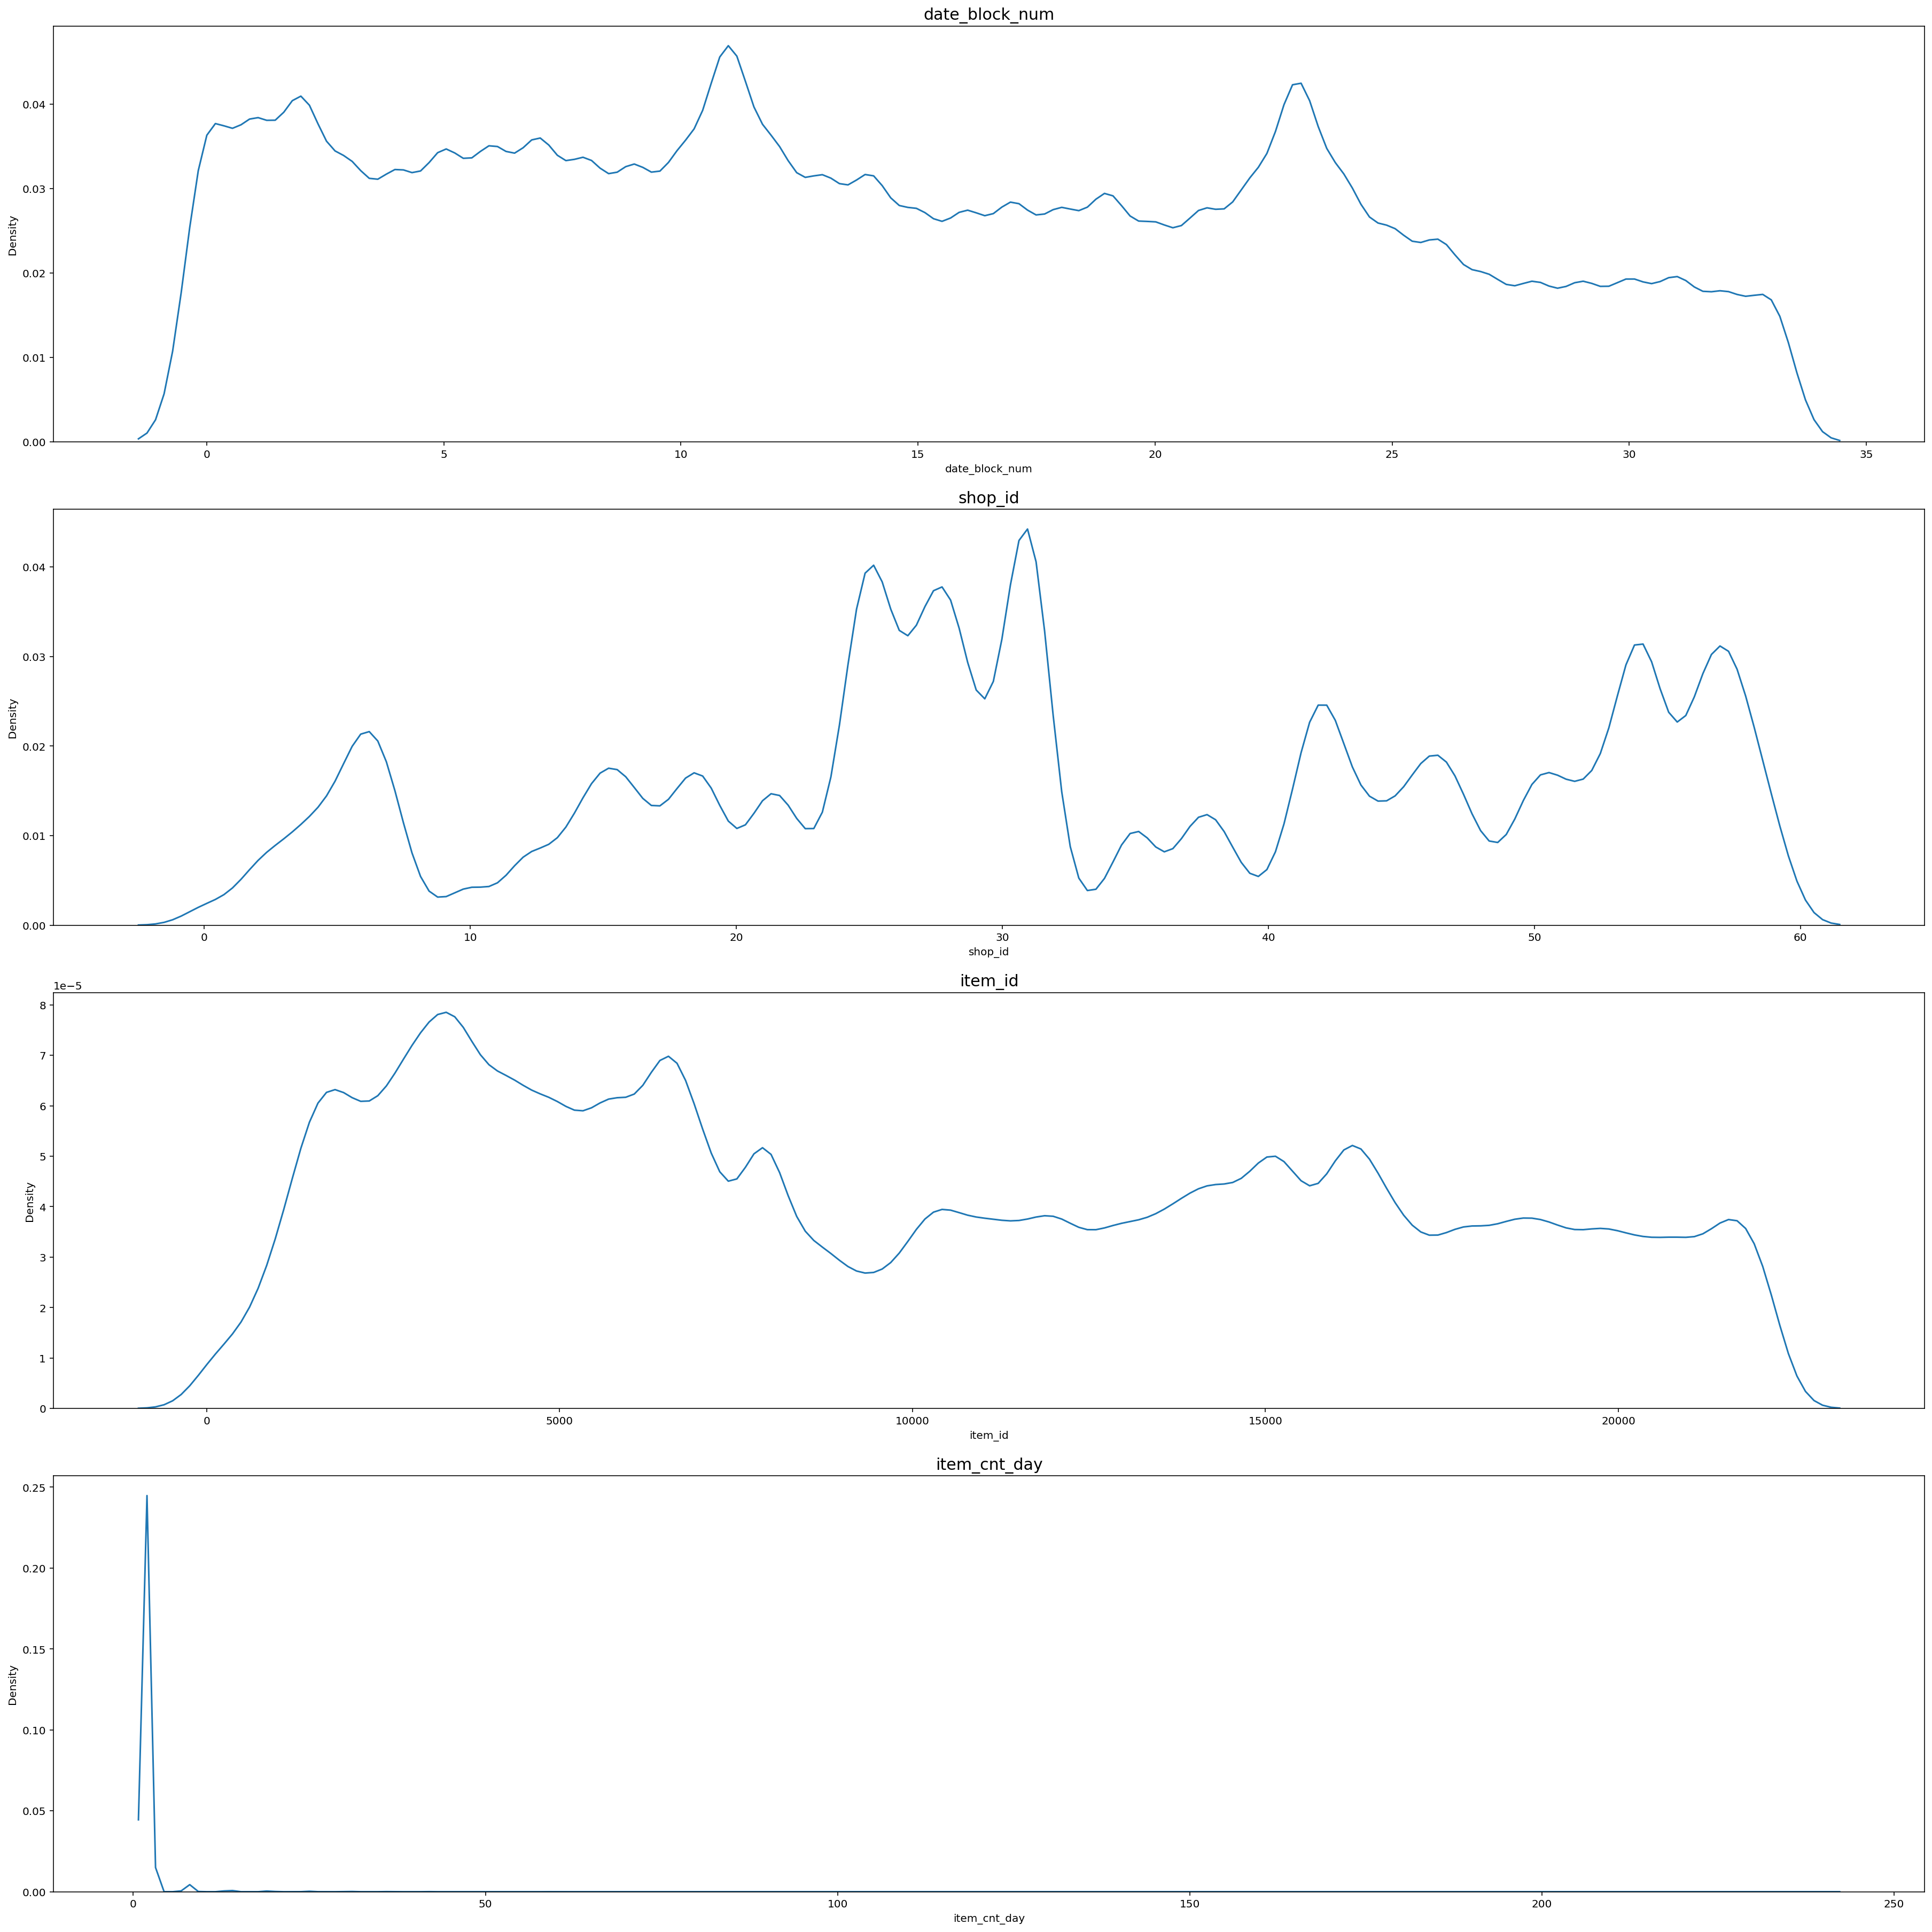

In [17]:
# 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 
# constrained_layout=True 그래프간 겹치지않게 최적의 간격조절
columns = data.columns
fig, ax = plt.subplots(len(columns), figsize=(25, 25), constrained_layout=True)   

for idx, row in enumerate(range(len(columns))):
    sns.kdeplot(data[columns[idx]], ax=ax[row])
    ax[row].set_title(columns[idx], fontsize=15)

In [ ]:
y = data.loc[(data['item_cnt_day'] < 250)&(data['item_cnt_day'] >= 0)]['item_cnt_day']
del data['item_cnt_day']

In [ ]:
z

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

In [ ]:
data.columns

In [ ]:
data.columns

In [ ]:
len(data)

In [ ]:
len(y)

In [ ]:
data

In [ ]:
y[0]

In [ ]:
def get_cv_score(model, name):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(data.values)
    print("Model {} CV score : {:.4f}".format(name, np.mean(cross_val_score(model, data.values, y, cv=kfold))))


In [ ]:
get_cv_score(gboost, 'gboost')

In [ ]:
get_cv_score(xgboost, 'xgboost')

In [ ]:
get_cv_score(lightgbm, 'lightgbm')

In [ ]:
print('clear')

In [ ]:
sub.columns

In [ ]:
sub

In [ ]:

def m_pre(model, x, y, sub_x):
    model.fit(x.values, y)
    
    return model.predict(sub_x.values)

print('얍💢')

In [ ]:
data

In [ ]:
sub

In [ ]:
len(data)==len(y)

In [ ]:
y_pred = m_pre(gboost, temp, y, sub)

In [ ]:
print(y_pred)

In [ ]:
sns.kdeplot(y_pred)
plt.show()

In [ ]:
result = sub.copy()

In [ ]:
result['item_cnt_day'] = y_pred

In [ ]:
result

In [ ]:
data_dir = './datas'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

In [ ]:
result = pd.DataFrame({
    'ID' : sub_id, 
    'item_cnt_month' : y_pred
})

result.head()

In [ ]:
my_submission_path = join('./datas', 'submission2.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)